## 特征工程

特征工程是算法竞赛中工作量最大，决定参赛者能否拿到较好名次的关键部分。吴恩达老师说过：***“机器学习在本质上还是特征工程，数据和特征决定了机器学习的上限，模型和算法只是在逼近这个上限而已。”***    
基本上参赛者会将80%的时间和精力用来搭建特征工程。   
特征过程鉴于数据和算法之间，特征工程将原始数据转化为特征，特征能够更好的向预测模型描述潜在的问题。   
特征工程主要分为**数据预处理**，**特征变换**，**特征提取**，**特征选择**四个部分。   

### 1 数据预处理

在算法竞赛中，我们拿到的数据集有可能包含大量错漏数据，既可能因为人工录入错误导致异常点存在使数据变“脏”，，这些错漏信息非常不利于模型训练，会使模型没办法从数据集中学到较为准确的规律。   
数据质量直接决定模型的准确性和泛化性，同时在构造特征时也会影响顺畅性。   

#### 1.1 缺失值处理

无论是在竞赛还是在实际问题中，经常会遇到数据集存在数据缺失的情况。例如：信息无法收集、系统出现故障或者用户拒绝分享他们的信息等导致数据缺失。   
面对数据缺失，除了XGBoost和LightGBM等算法在训练时可以直接处理缺失值以外，其他很多算法（比如`LR`、`DNN`、`CNN`、`RNN`等）并不能对缺失值进行直接处理。在数据准备阶段，要比构建算法阶段花费更多的时间。

##### 1.1.1 区分缺失值
首先参赛者需要找到缺失值的表现形式。缺失值的表现除了`None`、`NA`、`NaN`这些，还包括其他用于表示数值缺失的特殊数值，例如使用-1或-999来填充的缺失值。还有一种是看着像缺失值，却有实际意义的业务，这种情况就需要特殊对待。例如，没有填写“婚姻状态”这一项的用户可能对自己的隐私比较敏感，应为其单独设为一个分类。没有填写“驾龄”这一项的用户可能是没有车，为其填充0比较合理。   
也就是说，**当找到缺失值时，需要根据不同应用场景下缺失值可能包含的信息进行合理填充。**

##### 1.1.2 处理方法
数据缺失可以分为`类别特征的缺失`和`数值特征的缺失`两种，他们的填充方法不同。   
对于类别特征，通常会填充一个新类别，可以是0、-1、负无穷等。   
对于数值特征，最基本的方法是均值填充，不过这个方法对异常值特别敏感，所以可以选择中位数填充，这个方法对异常值不敏感。   
在进行数据填充时，一定要考虑所选择的填充方法会不会影响数据的准确性。   
填充方法总结如下：   
`对于类别特征`：可以选择最常见的一类填充方法，填充众数；或者直接填充一个新类别。比如0、-1、负无穷。   
`对于数值特征`：可以填充平均数、中位数、众数、最大值、最小值等。具体填充哪种统计值，需要具体问题具体分析。   
`对于有序数据（比如时间序列）`：可以填充相邻值next或者previous。   
`模型预测填充`：普通的填充只是一个结果的常态，并未考虑其他特征之间相互作用的影响，可以对含缺失值的那一列进行建模并预测其中缺失值的结果。这种方法比较复杂，但是最后得到的结果直觉上比直接填充要好。

#### 1.2 异常值处理

在实际数据中，常常会发现某个或某些字段（特征）根据某个变量排序后，存在一些数值远远高于或低于一定范围内的其他数值。还有些不符合常态的存在，例如广告点击用户中出现年龄为0或超过100的情况。这些我们都可以当作异常值，它们的存在可能会对算法性能带来负作用。   

##### 1.2.1 寻找异常值   
1.通过可视化分析的方法发现异常值。例如使用散点图我们可以很清晰地观察到异常值的存在，严重偏离密集区域地点都可以当作异常值来处理。   
2.通过简单的统计分析来发现异常值，例如：`四分位数间隔`、`极差`、`均差`、`标准差`等，这种方法适合于挖掘单变量的数值型数据。（使用箱线图）

##### 1.2.2 处理异常值   
`删除含有异常值的记录`：这种方法的优点是可以消除含有异常值的样本带来的不确定性，缺点是减少了样本量。   
`视为缺失值`：利用缺失值处理的方法进行处理。优点是将异常值集中化为一类增加了数据的可用性，缺点是将异常值和缺失值混为一谈，有可能影响数据的准确性。   
`平均值（中位数）修正`：对应同类别的数值使用平均值修正改异常值，其实与处理缺失值的方法类似。   
`不处理`：好坏取决于异常值的来源，若异常值是录入错误导致的，则对数据挖掘的效果会产生负面效果；若异常值只是对真实情况的记录，则直接进行数据挖掘能够保留最真实可信的信息。   

### 2 特征变换

数据预处理结束后，有时参赛者还需要对特征进行一些数值变换，且在实际竞赛中，很多原始特征并不能直接使用，这时就需要进行一定的调整。

#### 2.1 连续变量无量纲化

无量纲化指的是将不同规格的数据转换到同一规格。常见的无量纲化方法有`标准化`和`区间缩放化`。   
`标准化`的前提是特征服从正态分布，标准化后，特征值服从标准正态分布。   
`区间缩放法`利用了边界值信息，将特征的取值区间缩放到某个特定的范围。   
单特征转换是构建一些模型（如`线性回归`、`KNN`、`神经网络`）的关键，对决策树相关模型没有影响，这也是决策树及其所有衍生算法（随机森林、梯度提升）日益流行的原因之一。   
还有一些纯粹的工程原因，即在进行回归预测中，对目标取对数处理，不仅可以缩小数据范围。而且压缩变量尺度使数据更平稳。这种转换方式是一个特殊情况，通常由使数据集适应算法要求的愿望驱动。

#### 2.2 连续变量数据变换

##### 2.2.1 log变换
进行log变换可以将倾斜数据变得接近正太分布，这是因为大多数机器学习模型不能很好地处理非正态分布地数据，比如右倾数据。可以应用`log(x+1)`变换来修正倾斜，加1是为了防止数据为0，同时保证x都是正的。取对数不会改变数据的性质和相关关系，但是压缩了变量的尺度，不仅数据更加平稳，还削弱了模型的共线性、异方差性等。

d:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

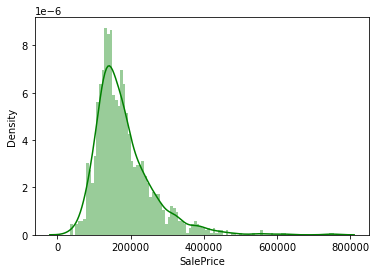

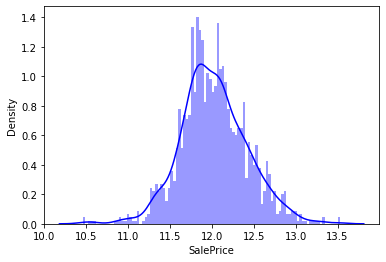

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
plt.figure()
sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha':0.4})
plt.figure()
sns.distplot(np.log(train['SalePrice']), color='b', bins=100, hist_kws={'alpha':0.4})

##### 2.2.2 连续变量离散化
离散化后的特征对异常数据有很强的健壮性，更便于探索数据的相关性。例如将年龄离散化：如果年龄大于30则为1否则为0.如果没有离散化，异常值“年龄300岁”会给模型造成很大干扰。常见的离散化分为无监督和有监督两种。   
`无监督的离散化`：分桶操作可以将连续变量离散化，同时使数据平滑，即降低噪声的影响。分为`等频`和`等距`两种分桶方式。   
`等频`：区间的边界值要经过选择，使得每个区间包含数量大致相等的变量实例。比如分成10个区间，那么每个区间应该包含大约10%的实例。这种分桶方式可以将数据变换成均匀分布。   
`等距`：将实例从最小值到最大值，均分为N等份，每份的间距是相等的。这里只考虑边界，每等份的实例数量可能不等。等距可以保持数据原有的分布，并且区间越多对数据原貌保持的越好。   
`有监督的离散化`：这类方法对目标有很好的区分能力，常用的使用树模型返回叶子节点进行离散化。   
例如我们使用`GBDT+LR`的模型，具体方法是用训练集中的所有`连续值`和`标签`输出来训练`LightGBM`,共训练两棵决策树，第一棵树有4个叶子结点，第二棵树有3个叶子结点。如果样本落在第一棵树的第3个叶子结点上，落在第二棵树的第一个叶子节点上，那么类别编码就是`0010100`,一共有七个离散特征，其中会有两个取值为1的地方。

##### 2.2.3 类别特征转换
在实际情况中，特征并不一定是数值，还有可能是类别。对于离散型类别变量进行编码，一般分为两种情况：`自然数编码`（特征有意义）和`独热编码`（特征没有意义）。   
`自然数编码`:有意义的类别特征（即有顺序关系）可以利用自然数进行编码，利用自然数的大小关系可以保留其顺序关系。此外，当特征不是数字而是用字母或者符号等表示时，是无法直接被喂到模型里作为训练标签的，比如年龄段、学历等，这时候需要把特征转换为数字。   
例如一列特征有K个取值，经过自然数编码为每个类别特征分配一个编号，这样做的优点是内存消耗少、训练时间快，缺点是会丢失部分特征信息。   
`独热编码`：当类别特征没有意义时，可以使用独热编码。

In [29]:
# 自然数编码
fea_col = ['苹果', '橘子', '香蕉', '苹果', '香蕉']
# 基于sklearn中的方法
print('基于sklearn中的方法：')
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(fea_col)
print(fea_col)
ne_hot_gf = le.transform(fea_col)
print(ne_hot_gf )
# 手动实现
print('手动实现：')
fea_col = pd.Series(fea_col)
fea_col = fea_col.map(dict(zip(fea_col.unique(), range(0, fea_col.nunique()))))
print(fea_col)

基于sklearn中的方法：
['苹果', '橘子', '香蕉', '苹果', '香蕉']
[1 0 2 1 2]
手动实现：
0    0
1    1
2    2
3    0
4    2
dtype: int64


### 3 特征提取

机器学习模型很难识别复杂的模式，特别是很难学习到由不同特征组合交互的信息，所以我们可以基于对数据集的直觉分析和业务理解创建一些特征来帮助模型有效学习。   
这里的特征提取对应于`结构化数据`（结构化数据由明确定义的数据类型组成，非结构化数据指文本、图片、视频等不容易处理、没有固定模式的数据）

#### 3.1 类别相关的统计特征
类别特征又可以称为离散特征，除了每个类别特征属性的特定含义外，还可以构造连续型的统计特征，以挖掘更多有价值的信息，比如构造目标编码、count、nunique和ratio等特征。另外也可以通过类别特征之间的交叉组合构造更加细粒度的特征。

##### 3.1.1 目标编码
目标编码可以理解为用目标变量（标签）的统计量对类别特征进行编码，即根据目标变量进行有监督的特征构造。如果是分类问题，可以统计正样本的个数、负样本个数或者正负样本的比例；如果是回归问题，则可以统计目标均值、中位数和最值。   
使用目标变量时，非常重要的一点是不能泄露任何验证集信息。所有基于目标编码的特征都应该在训练集上计算，测试集则由完整的训练集来构造。更严格一点，我们在统计训练集的特征时，需要采用K折交叉统计法构造目标编码特征，从而最大限度地防止信息泄露。   
目标编码方法对于基数较低的类别特征通常很有效，但对于基数较高的类别特征，可能会由过拟合的风险。因为会有一些类别出现的频次非常低，统计出来的结果不具有代表性。一般会加入过平滑来降低过拟合风险。   
在处理妥当的情况下，无论是线性模型还是非线性模型，目标编码都是最佳的编码方式和特征构造方式。   

In [30]:
from sklearn.model_selection import KFold
# 五折交叉构造目标编码
columns = []
folds = KFold(n_splits=5, shuffle=True, random_state=2023)
for col in columns:
    colname = col + '_kfold'
    for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train)):
        tmp = train.iloc[trn_idx]
        order_label = tmp.groupby([col])['label'].mean()
        train[colname] = train[col].map(order_label)
    order_label = train.groupby([col])['label'].mean()
    test[colname] = test[col].map(order_label)

##### 3.1.2 count、nunique、ratio
`count`（计数特征）用于统计类别特征的出现频次。`nunique`和`ratio`的构造相对复杂一点，经常会涉及到多个类别特征的联合构造，例如在广告点击预测问题中，对于用户ID和广告ID，使用`numique`可以反映用户对广告的兴趣宽度，也就是统计用户看过几种广告；使用`ratio`可以反映用户对某类广告的偏好程度，也就是统计用户点击某类广告的频次占用户点击所有广告频次的比例。

##### 3.1.3 类别特征之间交叉组合
交叉组合能够描述更细粒度的内容。对类别特征进行交叉组合在竞赛中是一项非常重要的工作，这样可以进行很好的非线性特征拟合。例如用户年龄和用户性别可以组合为“年龄_性别”新特征，简单来说就是对两个特征进行笛卡尔积的操作，产生新的类别特征。
并非所有组合都是需要考虑的，首先是业务逻辑方面，两个特征的组合可能是没有意义的，比如用户的操作系统版本和用户所在城市；然后是类别特征的基数，如果基数过大，那么可能导致很多类别只会出现一次，组合特征对应权重的置信度会很低。

#### 3.2 数值相关的统计特征
不同于类别特征，数值特征的大小是有意义的。   
`数值特征之间的交叉组合`：不同于类别特征之间的交叉组合，需要结合业务理解和数据分析进行构造。例如给出房屋大小和售价，就可以构造每平方米的均价。   
`类别特征和数值特征之间的交叉组合`：这类特征通常是在类别特征的某个类别中计算数值特征的一些统计量，比如均值、中位数、最值等。   

#### 3.3 时间特征
在实际数据中，通常给出的时间特征是时间戳，可以构建时间差特征。

#### 3.4 多值特征
在实际竞赛中，可能会遇到某一列特征中每行都包含多个属性的情况，这就是多值特征。对于多值特征，通常可以进行稀疏化或者向量化处理，类似自然语言处理中文本分词、word2vec、deepwalk等。

### 4 特征选择

当我们添加新特征时，需要验证它是否确实能够提高模型预测的准确度，以保证没有加入无用特征，因为这样只会增加算法运算的复杂度。特征选择算法用于识别并删除不需要、不相关、冗余的特征。方法主要有`先验的特征关联性分析`以及`后验的特征重要性分析`。

#### 4.1 特征关联性分析
特征关联性分析是使用统计量来为特征之间的相关性进行评分。特征按照分数进行排序，要么保留，要么从数据集中删除。关联性分析方法通常是针对单变量的。常见的特征关联性方法有`皮尔逊相关系数`、`卡方检验`、`互信息法`、`信息增益`等。这些方法速度非常快，不过忽略了特征之间的关系，以及特征和模型之间的关系。

##### 4.1.1 皮尔逊相关系数
这种方法可以衡量变量之间的线性相关性，解决共线变量问题，还可以衡量特征与标签的相关性。   
共线变量指变量之间存在高度相关关系，这会降低模型的学习可用性、可解释性以及测试集的泛化性能。

##### 4.1.2 卡方检验
用于检验特征变量与因变量的相关性。对于分类问题，一般假设与标签独立的特征为无关特征，而卡方检验恰好可以进行独立性检验，所以适用于特征选择。如果检验结果是某个特征与标签独立，则可以去除该特征。

#### 4.2 特征重要性分析
在实际竞赛中，经常用到的一种特征选择方法是基于树模型评估特征的重要性分数。特征的重要性分数越高，说明特征在模型中被用来构建决策树的次数越多。这里我们以XGBoost为例来介绍树模型评估特征重要性的三种计算方法（weight、gain和cover）。     

`weight计算方式`：计算特征在所有树中被选为分裂特征的次数，并将此作为评估特征重要性的依据。 

In [31]:
import xgboost as xgb
x, y = [[1,2,3]], [1]
params = {
    'max_depth': 10,
    'subsample': 1,
    'verbose_eval': True,
    'objective': 'binary:logistic'
}
xgtrain = xgb.DMatrix(x, label=y)
bst = xgb.train(params, xgtrain, num_boost_round=10)
importance = bst.get_score(fmap = '', importance_type='weight')

[18:06:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose_eval" } are not used.



`gain计算方式`：gain表示平均增益。在进行特征重要性评估时，使用gain表示特征在所有树中作为分裂节点的信息增益之和再除以该特征出现的频次。

In [32]:
importance = bst.get_score(fmap='', importance_type='gain')

`cover计算方式`：cover较为复杂，其具体含义是特征对每棵树的覆盖率，即特征被分到该结点的样本的二阶导数之和，表示平均覆盖率值。

In [33]:
importance = bst.get_score(fmap='', importance_type='cover')

虽然特征重要性可以帮助我们快速分析在模型训练过程中的重要性，但绝不能将其当作绝对的参考依据。一般而言，只要特征不会导致过拟合，我们就可以选择重要性高的特征进行分析和扩展，对于重要性低的特征，可以考虑将之从特征集中移除，然后观察效果，再进行进一步调整。

### 5 实战案例

#### 5.1 数据预处理
对缺失值和异常值进行处理。删除缺失值比例大于50%的特征列，并对object型的缺失特征进行填充。

In [34]:
import pandas as pd
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
ntrain = train.shape[0]
ntest = test.shape[0]

data = pd.concat([train, test], axis=0, sort=False)
missing_cols = [c for c in data if data[c].isna().mean()*100 > 50] # 删除缺失值比例大于50%的特征列
data = data.drop(missing_cols, axis=1)
## 对object型缺失特征进行填充
object_df = data.select_dtypes(include=['object'])
object_df = object_df.fillna('unknow')

对数值型特征用中位数进行填充

In [35]:
## 对数值类特征用中位数进行填充
numerical_df = data.select_dtypes(exclude=['object'])
missing_cols = [c for c in numerical_df if numerical_df[c].isna().sum() > 0]
for c in missing_cols:
    numerical_df[c] = numerical_df[c].fillna(numerical_df[c].median())

C:\Users\panda\AppData\Local\Temp\ipykernel_20752\1473352005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df[c] = numerical_df[c].fillna(numerical_df[c].median())


对于特征中属性的分布极不均衡的特征，比如某个属性占比超过95%，也要考虑将其删除。

In [36]:
## 删除类别不均衡的特征
object_df = object_df.drop(['Heating', 'RoofMatl', 'Condition2', 'Street', 'Utilities'], axis=1)

#### 5.2 特征提取
特征提取阶段将从多个角度进行具体的特征构造，并且构造的每个特征都具有实际的意义。

##### 5.2.1 基本特征构造
构建“房屋的建筑年龄”这个特征，在构建特征时发现存在销售日期（YrSold）的数据小于建造日期（YearBuilt）的数据，将异常数据的销售日期都改为数据集中销售日期的最大年份。

In [37]:
## 数值型特征构造
numerical_df.loc[numerical_df['YrSold'] < numerical_df['BsmtFullBath'], 'YrSold'] = 2009
numerical_df['Age_House'] = (numerical_df['YrSold'] - numerical_df['YearBuilt'])

d:\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\panda\AppData\Local\Temp\ipykernel_20752\3561993751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['Age_House'] = (numerical_df['YrSold'] - numerical_df['YearBuilt'])


构造业务相关特征，比如对原始特征中的浴池（BsmtFullBath）和半浴池（BsmtHalfBath）进行求和，对全浴（FullBath）和半浴（HalfBath）进行求和，对一楼面积（1stFlrSF）和二楼面积（2ndFlerSF）以及地下室面积求和，来表示房屋的结构信息。

In [38]:
## 数值型特征构造
numerical_df['TotalBsmtBath'] = numerical_df['BsmtFullBath'] + numerical_df['BsmtHalfBath'] * 0.5
numerical_df['TotalBath'] = numerical_df['FullBath'] + numerical_df['HalfBath'] * 0.5
numerical_df['TotalSA'] = numerical_df['TotalBsmtSF'] + numerical_df['1stFlrSF'] + numerical_df['2ndFlrSF']

C:\Users\panda\AppData\Local\Temp\ipykernel_20752\1663310718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['TotalBsmtBath'] = numerical_df['BsmtFullBath'] + numerical_df['BsmtHalfBath'] * 0.5
C:\Users\panda\AppData\Local\Temp\ipykernel_20752\1663310718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['TotalBath'] = numerical_df['FullBath'] + numerical_df['HalfBath'] * 0.5
C:\Users\panda\AppData\Local\Temp\ipykernel_20752\1663310718.py:4: SettingWithCopyWarning: 
A value is

##### 5.2.2 特征编码
object类型特征不能直接参与模型训练，需要先进行编码处理，类别类型的编码方法非常多，因此选择编码方法也很关键。   
对于存在大小关系的序数特征，可以进行0-N的映射转换，即自然数编码；对于没有大小关系的特征，可以采用独热编码或者频次编码。

In [39]:
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,
'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1, \
'IR3':0,"None" : 0,"No" : 2, "Mn" : 2, 
"Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, \
"Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6}
object_df['ExterQual'] = object_df['ExterQual'].map(bin_map)
object_df['ExterCond'] = object_df['ExterCond'].map(bin_map)
object_df['BsmtCond'] = object_df['BsmtCond'].map(bin_map)
object_df['BsmtQual'] = object_df['BsmtQual'].map(bin_map)
object_df['HeatingQC'] = object_df['HeatingQC'].map(bin_map)
object_df['KitchenQual'] = object_df['KitchenQual'].map(bin_map)
object_df['FireplaceQu'] = object_df['FireplaceQu'].map(bin_map)
object_df['GarageQual'] = object_df['GarageQual'].map(bin_map)
object_df['GarageCond'] = object_df['GarageCond'].map(bin_map)
object_df['CentralAir'] = object_df['CentralAir'].map(bin_map)
object_df['LotShape'] = object_df['LotShape'].map(bin_map)
object_df['BsmtExposure'] = object_df['BsmtExposure'].map(bin_map)
object_df['BsmtFinType1'] = object_df['BsmtFinType1'].map(bin_map)
object_df['BsmtFinType2'] = object_df['BsmtFinType2'].map(bin_map)
 
PavedDrive = {"N" : 0, "P" : 1, "Y" : 2}
object_df['PavedDrive'] = object_df['PavedDrive'].map(PavedDrive)

# 选择剩余的object特征
rest_object_columns = object_df.select_dtypes(include = ['object'])
# 进行one-hot编码
object_df = pd.get_dummies(object_df, columns = rest_object_columns.columns) 
 
data = pd.concat([object_df, numerical_df], axis=1, sort=False)
data

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_House,TotalBsmtBath,TotalBath,TotalSA
0,3,4,2,4.0,2.0,2.0,6.0,1.0,4,1,...,0,0,0,2,2008,208500.0,5,1.0,2.5,2566.0
1,3,2,2,4.0,2.0,4.0,5.0,1.0,4,1,...,0,0,0,5,2007,181500.0,31,0.5,2.0,2524.0
2,2,4,2,4.0,2.0,2.0,6.0,1.0,4,1,...,0,0,0,9,2008,223500.0,7,1.0,2.5,2706.0
3,2,2,2,2.0,4.0,2.0,5.0,1.0,4,1,...,0,0,0,2,2006,140000.0,91,1.0,1.0,2473.0
4,2,4,2,4.0,2.0,3.0,6.0,1.0,4,1,...,0,0,0,12,2008,250000.0,8,1.0,2.5,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3,2,2,2.0,2.0,2.0,1.0,1.0,4,1,...,0,0,0,6,2006,163000.0,36,0.0,1.5,1638.0
1455,3,2,2,2.0,2.0,2.0,3.0,1.0,2,1,...,0,0,0,4,2006,163000.0,36,0.0,1.5,1638.0
1456,3,2,2,2.0,2.0,2.0,5.0,1.0,4,1,...,0,0,0,9,2006,163000.0,46,1.0,1.0,2448.0
1457,3,2,2,4.0,2.0,3.0,6.0,1.0,2,1,...,0,0,700,7,2006,163000.0,14,0.5,1.0,1882.0


#### 5.3 特征选择
使用相关性评估的方式进行特征选择，可以过滤掉相似性大于一定阈值的特征，减少特征冗余。

In [41]:
def correlation(data, threshold):
    col_corr = set() 
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # 相似性分数与阈值对比
                colname = corr_matrix.columns[i]  # 获取列名
                col_corr.add(colname)
    return col_corr

all_cols = [c for c in data.columns if c not in ['SalePrice']]
corr_features = correlation(data[all_cols], 0.9)
corr_features

{'Age_House',
 'Exterior2nd_CmentBd',
 'Exterior2nd_MetalSd',
 'Exterior2nd_VinylSd',
 'Exterior2nd_unknow',
 'GarageFinish_unknow',
 'LandSlope_Mod',
 'RoofStyle_Hip',
 'SaleCondition_Partial',
 'TotalBath',
 'TotalBsmtBath'}